# Importer les librairies nécessaires

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement de données

In [ ]:
data = pd.read_csv('new_Base_CDM_balanced_V2.csv' , delimiter=';')

In [ ]:
# Supprimer la premiere ligne du dataframe
data = data.drop(0)

# Réinitialiser les index après la suppression
data = data.reset_index(drop=True)
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
1,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
2,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
3,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
4,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [ ]:
# Obtenir des informations sur les types de données et les valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 0 to 25781
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Y       25782 non-null  object
 1   X1      25782 non-null  object
 2   X2      25782 non-null  object
 3   X3      25782 non-null  object
 4   X4      25782 non-null  object
 5   X5      25782 non-null  object
 6   X6      25782 non-null  object
 7   X7      25782 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [ ]:
# Résumé statistique des variables 
data.describe()

,Y,X1,X2,X3,X4,X5,X6,X7
count,25782,25782,25782,25782,25782,25782,25782,25782
unique,2,363,8957,323,84,19,1589,2
top,No_Displ,1,7.5,109503,40,CARREFOUR,40,No_Feat
freq,13000,5827,64,255,3314,4629,828,19495


In [ ]:
# Compter les valeurs uniques dans la colonne de la variable cible (Y)
data['Y'].value_counts()

No_Displ    13000
Displ       12782
Name: Y, dtype: int64

In [ ]:
# Compter les valeurs uniques dans la colonne de la variable X5 (Enseigne)
data['X5'].value_counts()

CARREFOUR           4629
LECLERC             4257
CASINO              3370
AUCHAN              3003
INTERMARCHE         2701
CORA                1883
CARREFOUR MARKET    1500
SUPER U             1265
SIMPLY MARKET        913
GEANT                761
MONOPRIX             732
MATCH                241
MARCHE U             153
PRISUNIC              99
HYPER U               71
ECOMARCHE             69
OTHERS                60
FRANPRIX              48
SHOPI                 27
Name: X5, dtype: int64

In [ ]:
# Compter les valeurs uniques dans la colonne de la variable X7 (Feature)
data['X7'].value_counts()

No_Feat    19495
Feat        6287
Name: X7, dtype: int64

In [ ]:
#  Le nombre de valeurs manquantes par colonne
data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

# Exploration des données

## Categorical features

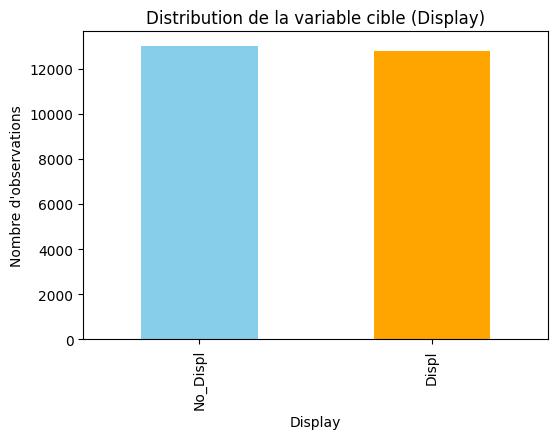

In [ ]:
import matplotlib.pyplot as plt

# Visualiser la distribution de la variable cible
plt.figure(figsize=(6, 4))
data['Y'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution de la variable cible (Display)')
plt.xlabel('Display')
plt.ylabel('Nombre d\'observations')
plt.show()


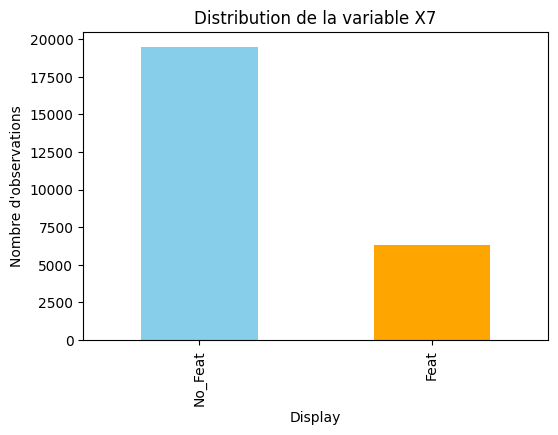

In [ ]:
# Visualiser la distribution de la variable X7
plt.figure(figsize=(6, 4))
data['X7'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution de la variable X7')
plt.xlabel('X7')
plt.ylabel('Nombre d\'observations')
plt.show()


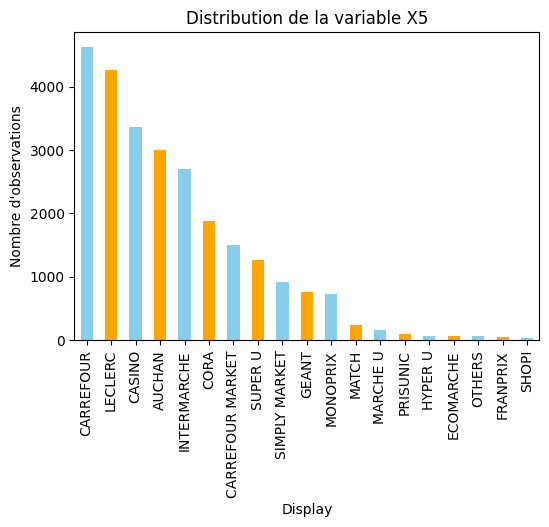

In [ ]:
# Visualiser la distribution de la variable X5
plt.figure(figsize=(6, 4))
data['X5'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution de la variable X5')
plt.xlabel('X5')
plt.ylabel('Nombre d\'observations')
plt.show()


## Numerical features

In [ ]:
# Liste des noms des variables numériques
numerical_features = ["X1", "X2",
                      "X3", "X4", "X6"]

In [ ]:
# function to plot side by side scatter plots of the numerical features
def plot_scatter(df, features):
    for feature in features:
        df.plot.scatter(feature, 'Y', figsize=(5, 5))
        plt.show()

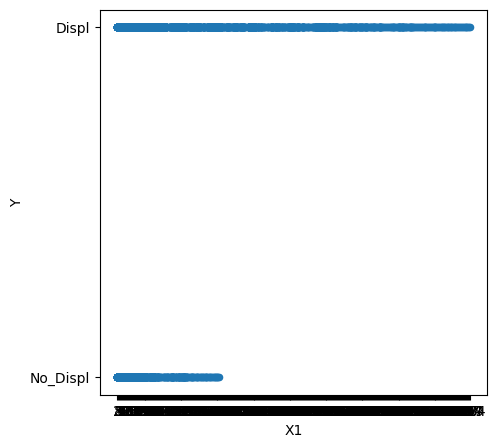

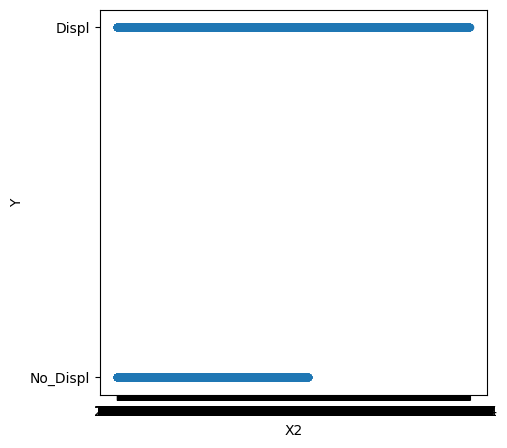

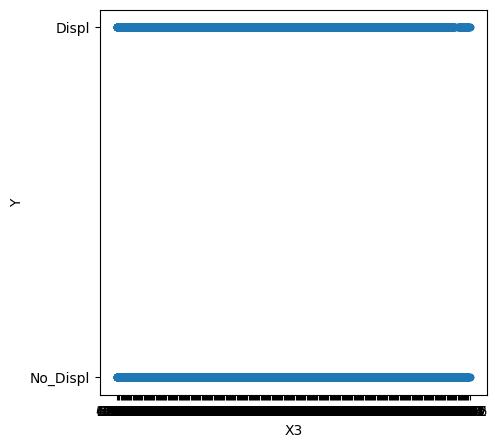

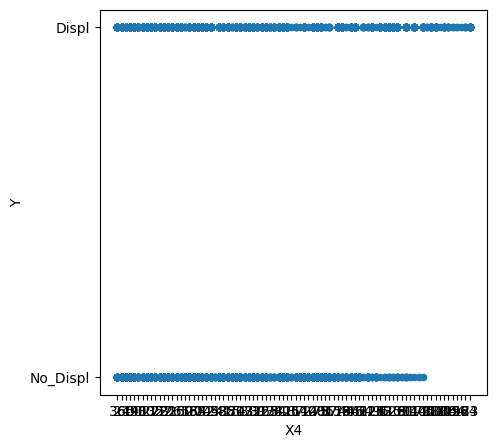

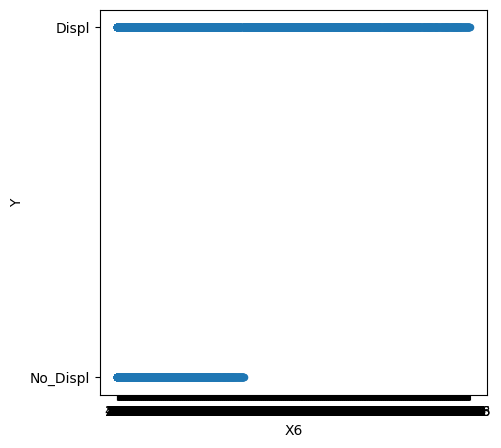

In [ ]:
plot_scatter(data, numerical_features)

# Transforming Categorical features

In [ ]:
# Définir la correspondance entre les classes et les valeurs numériques
mapping = {'No_Displ': 1, 'Displ': 0}
mapping1 = {'No_Feat': 1, 'Feat': 0}

# Appliquer la conversion 
data['Y'] = data['Y'].map(mapping)
data['X7'] = data['X7'].map(mapping1)

In [ ]:
# Appliquer le One-Hot Encoding à la variable X5
data = pd.get_dummies(data, columns=['X5'], drop_first=True)

# Split our Data into training and testing sets

In [ ]:
X = data.drop('Y' , axis=1)
y = data['Y'].values
X[:5]

,X1,X2,X3,X4,X6,X7,X5_CARREFOUR,X5_CARREFOUR MARKET,X5_CASINO,X5_CORA,...,X5_INTERMARCHE,X5_LECLERC,X5_MARCHE U,X5_MATCH,X5_MONOPRIX,X5_OTHERS,X5_PRISUNIC,X5_SHOPI,X5_SIMPLY MARKET,X5_SUPER U
0,2,20.2,47400,36,72,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,11.9,62000,24,48,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8,29.52,60661,60,480,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,16.2,59677,19,38,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,62.1,142602,50,250,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=4)
x_train.shape,x_test.shape,len(y_train),len(y_test)

((20625, 24), (5157, 24), 20625, 5157)

# Modèles Implémentés

- **Régression logistique**

- **k-nearest neighbors**

- **Arbre de décision**


- **Adaboost (adaptive boosting)**

- **Random Forest**

- **Neural Network**


## Decision Tree

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Définir le modèle
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)

# Calculer l'accuracy sur les données de test
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Précision sur les données de test:", accuracy_dt)

Précision sur les données de test: 0.7965871630793097


## {'No_Displ': 1, 'Displ': 0}

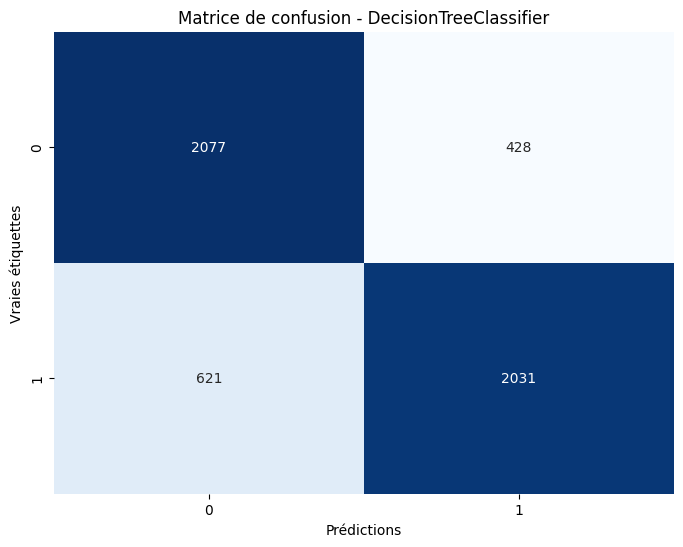

In [ ]:
# Matrice de confusion pour DecisionTreeClassifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# visualisation du Matrice de confusion pour le modèle DecisionTreeClassifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - DecisionTreeClassifier')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [ ]:
# Définir le modèle
DT = DecisionTreeClassifier()

# Définir la grille des paramètres à tester
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajuster le modèle aux données d'entraînement
grid_search.fit(x_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Prédire sur les données de test avec le meilleur modèle trouvé
y_pred = grid_search.predict(x_test)

# Calculer l'accuracy sur les données de test
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur les données de test:", accuracy)


Meilleurs paramètres: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
Précision sur les données de test: 0.7967810742679853


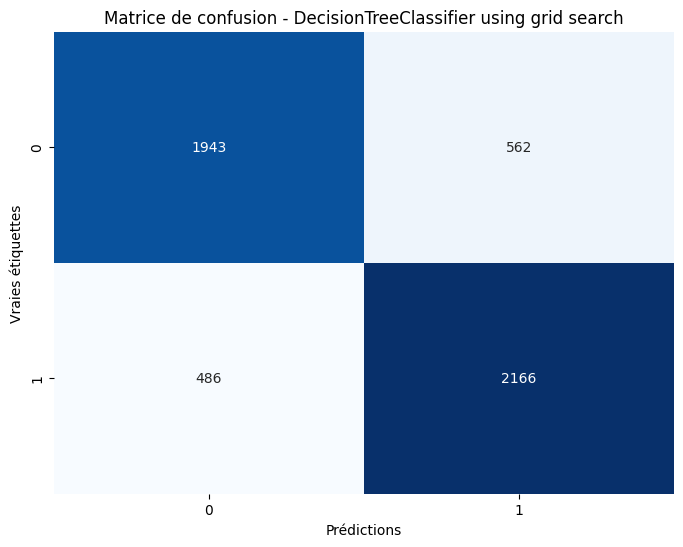

In [ ]:
# Matrice de confusion pour DecisionTreeClassifier
conf_matrix_dt = confusion_matrix(y_test, y_pred)
# visualisation du Matrice de confusion pour DecisionTreeClassifier en utilisant le Grid search
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - DecisionTreeClassifier using grid search')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Adaboost (adaptive boosting)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Create an instance of AdaBoostClassifier
ada_boost = AdaBoostClassifier()

# Fit the model to the training data
ada_boost.fit(x_train, y_train)

# Predict on the test data
y_pred_ada = ada_boost.predict(x_test)

# Calculate accuracy on the test data
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy on test data for AdaBoost:", accuracy_ada)

Accuracy on test data for AdaBoost: 0.7878611595889082


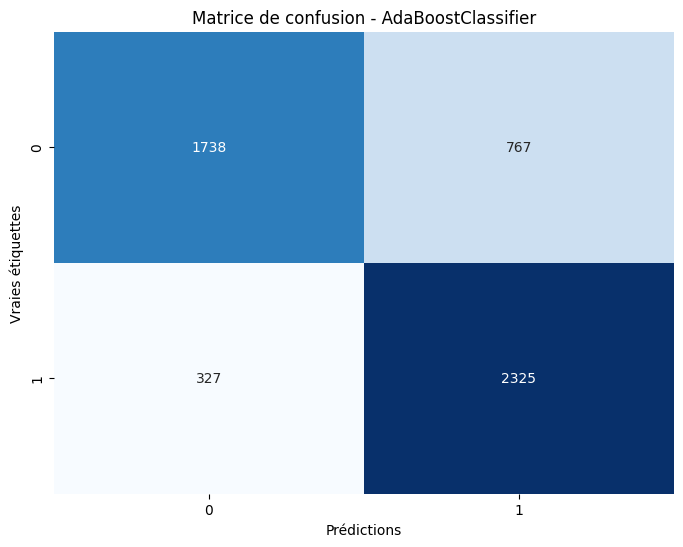

In [ ]:
# Display the confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# visualisation du Matrice de confusion pour AdaBoost 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - AdaBoostClassifier')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



# Créer un modèle KNN
knn_model = KNeighborsClassifier()

# Entraîner le modèle sur l'ensemble d'entraînement
knn_model.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_knn = knn_model.predict(x_test)

# Évaluer les performances du modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Afficher les résultats
print(f'Accuracy: {accuracy_knn}')


Accuracy: 0.7343416715144464


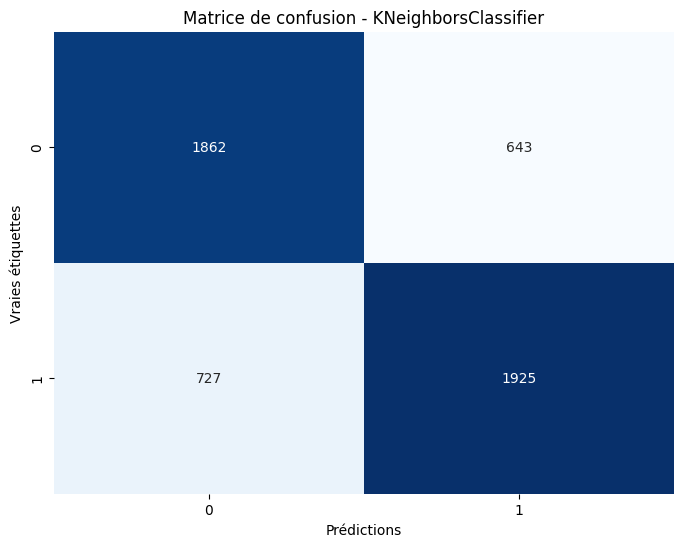

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
# visualisation du Matrice de confusion pour le modèle KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - KNeighborsClassifier')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Définir le modèle Random Forest
RF = RandomForestClassifier()
# Ajuster le modèle aux données d'entraînement
RF.fit(x_train, y_train)

# Prédire sur les données de test avec le meilleur modèle trouvé
y_pred_rf = RF.predict(x_test)

# Calculer l'accuracy sur les données de test
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Précision sur les données de test pour RandomForest:", accuracy_rf)


Précision sur les données de test pour RandomForest: 0.8402171805313167


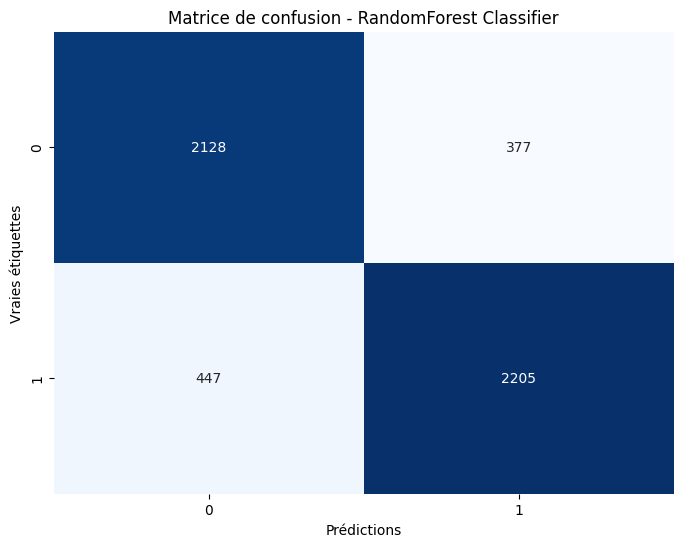

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# visualisation du Matrice de confusion pour le modèle Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - RandomForest Classifier')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression


# Create an instance of LogisticRegression
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(x_train, y_train)

# Predict on the test data
y_pred_logreg = logreg_model.predict(x_test)

# Calculate accuracy on the test data
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy on test data for Logistic Regression:", accuracy_logreg)

Accuracy on test data for Logistic Regression: 0.7578049253441924


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


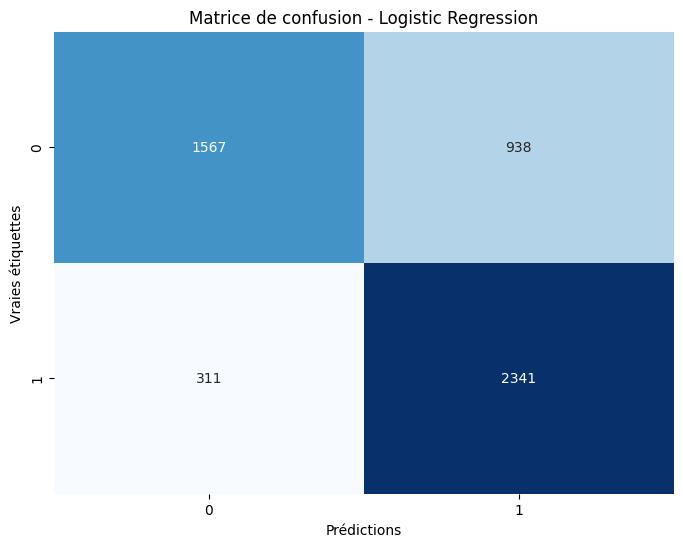

In [ ]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# visualisation du Matrice de confusion pour le modèle Régression logistique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - Logistic Regression')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Neural network

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


# Normaliser les données (très important pour les réseaux de neurones)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(x_train)
X_test_norm = scaler.transform(x_test)

# Créer un modèle de réseau de neurones simple
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_norm.shape[1]),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_norm, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Évaluer les performances du modèle sur l'ensemble de test
predictions = (model.predict(X_test_norm) > 0.5).astype('int32')  # Conversion des probabilités en classes binaires
accuracy = accuracy_score(y_test, predictions)

# Afficher les résultats
print(f'Accuracy: {accuracy}')


Epoch 1/10
581/581 [==============================] - 3s 3ms/step - loss: 0.5124 - accuracy: 0.7505 - val_loss: 0.4859 - val_accuracy: 0.7843
Epoch 2/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4890 - accuracy: 0.7678 - val_loss: 0.4794 - val_accuracy: 0.7853
Epoch 3/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4850 - accuracy: 0.7695 - val_loss: 0.4756 - val_accuracy: 0.7906
Epoch 4/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.7729 - val_loss: 0.4774 - val_accuracy: 0.7814
Epoch 5/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4802 - accuracy: 0.7723 - val_loss: 0.4760 - val_accuracy: 0.7780
Epoch 6/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4789 - accuracy: 0.7736 - val_loss: 0.4738 - val_accuracy: 0.7848
Epoch 7/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.7749 - val_loss: 0.4696 - val_accuracy: 0.7877
Epoch 

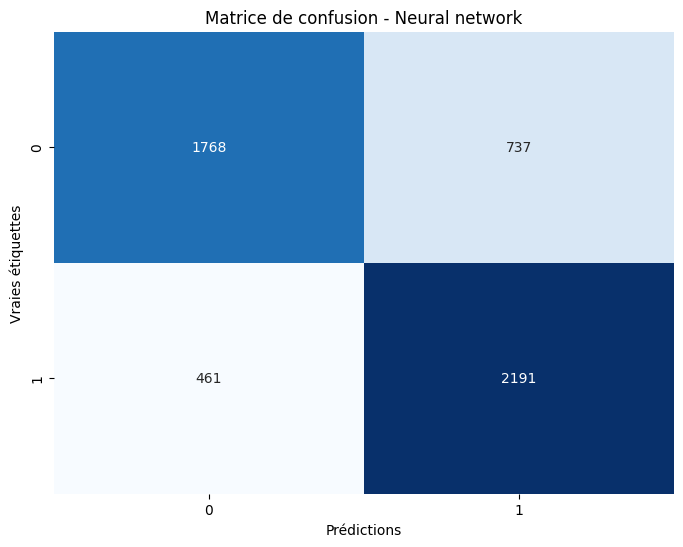

In [ ]:
conf_matrix_NN = confusion_matrix(y_test, predictions)

# visualisation du Matrice de confusion pour les Réseaux de neurones
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_NN, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - Neural network')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

# Grid search for find the best parameter 

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Définir le modèle
RF = RandomForestClassifier()

# Définir la grille des paramètres à tester
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Créer l'objet GridSearchCV
grid_search_rf = GridSearchCV(estimator=RF, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Ajuster le modèle aux données d'entraînement
grid_search_rf.fit(x_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres pour RandomForest:", grid_search_rf.best_params_)

# Prédire sur les données de test avec le meilleur modèle trouvé
y_pred_rf = grid_search_rf.predict(x_test)

# Calculer l'accuracy sur les données de test
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Précision sur les données de test pour RandomForest:", accuracy_rf)


Meilleurs paramètres pour RandomForest: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Précision sur les données de test pour RandomForest: 0.8415745588520458


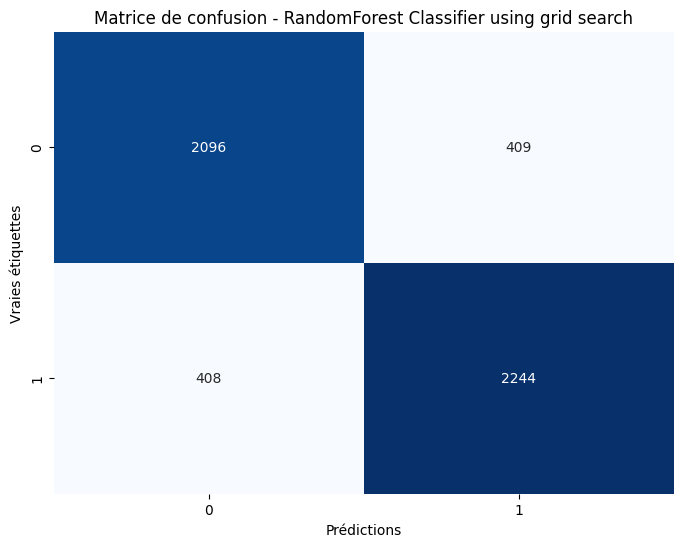

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# visualisation du Matrice de confusion pour le modèle RandomForest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - RandomForest Classifier using grid search')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Adaboost

In [ ]:
# Création d'une instance de AdaBoostClassifier
ada_boost = AdaBoostClassifier()

# Définition de la grille des paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Création de l'objet GridSearchCV pour la recherche sur grille 
grid_search_ada = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustement du modèle aux données d'entraînement
grid_search_ada.fit(x_train, y_train)


# Afficher les meilleurs paramètres
print("Meilleurs paramètres pour AdaBoost:", grid_search_ada.best_params_)

# Prédiction sur les données de test
y_pred_ada = grid_search_ada.predict(x_test)

# Calcul de l'accuracy sur les données de test
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Précision sur les données de test pour AdaBoost:", accuracy_ada)


Meilleurs paramètres pour AdaBoost: {'learning_rate': 0.2, 'n_estimators': 200}
Précision sur les données de test pour AdaBoost: 0.7865037812681792


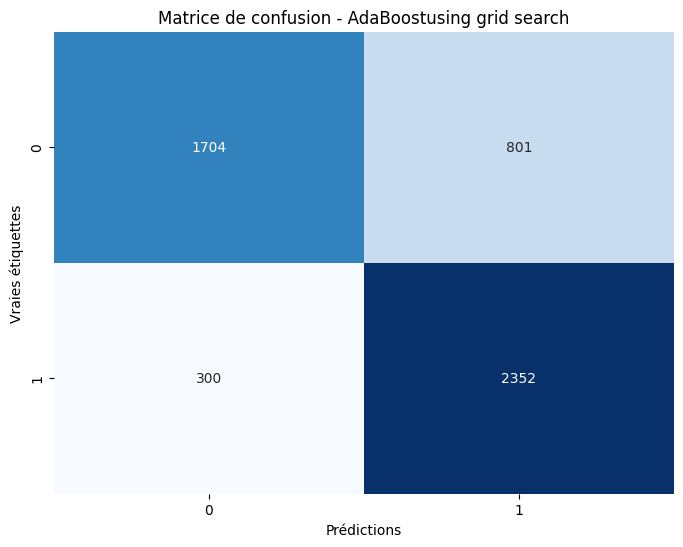

In [ ]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# visualisation du Matrice de confusion pour le modèle AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - AdaBoosting grid search')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## KNN with different K = n_neighbors 
## n_neighbors = le nombre de voisins à prendre en compte lors de la classification 

In [ ]:

ks = 5
mean_acc = np.zeros((ks-1))
for i in range(1,ks) :
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train , y_train) 
    predict = neigh.predict(x_test)
    mean_acc[i-1] =  accuracy_score(y_test , predict)

mean_acc

array([0.73977118, 0.70893931, 0.73375994, 0.72290091])

In [ ]:
print("The best accuracy was with ",mean_acc.max() , " with k = " , mean_acc.argmax()+1)

The best accuracy was with  0.7397711847973628  with k =  1


In [ ]:
k = mean_acc.argmax()+1

# Créer un modèle KNN avec k = 1
knn_model = KNeighborsClassifier(n_neighbors = k)

# Entraîner le modèle sur l'ensemble d'entraînement
knn_model.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_knn = knn_model.predict(x_test)

# Évaluer les performances du modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Afficher les résultats
print(f'Accuracy: {accuracy_knn}')


Accuracy: 0.7397711847973628


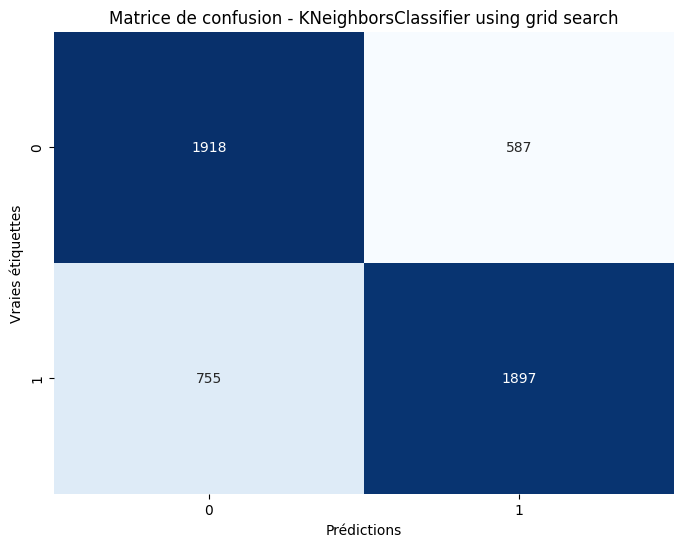

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# visualisation du Matrice de confusion pour le modèle KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - KNeighborsClassifier using grid search')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()